In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import plotly.express as px

In [2]:
df = pd.read_csv("../data/Mall_Customers.csv")

In [3]:
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

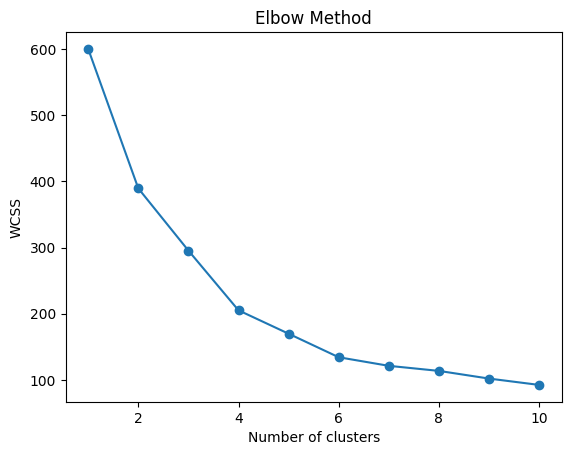

In [5]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [6]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

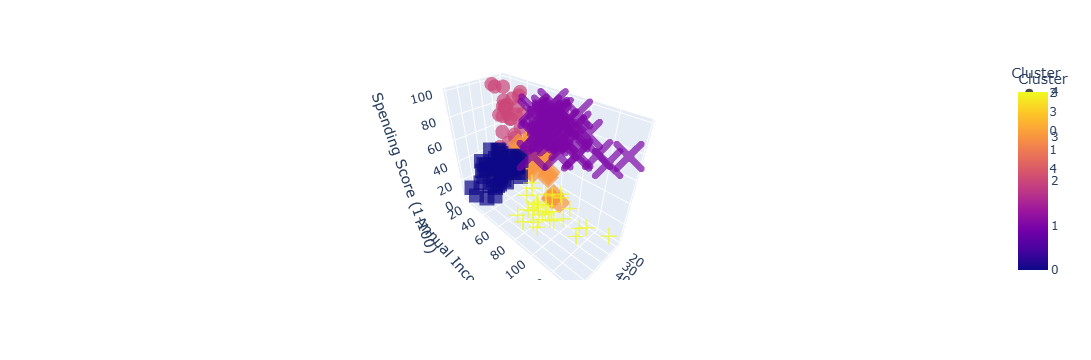

In [7]:
fig = px.scatter_3d(
    df, x='Age', y='Annual Income (k$)', z='Spending Score (1-100)',
    color='Cluster', symbol='Cluster', size_max=10, opacity=0.7
)
fig.show()